# Employee Data Analysis

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('19-employees.csv')

# Standardize column names
df.columns = [col.strip() for col in df.columns]

# Apply the filters
filtered_df = df[
    (df['PerformanceScore'].isin(['Exceeds', 'Fully Meets'])) &
    (df['EmploymentStatus'].str.lower() == 'active') &
    (df['Salary'] > 60000) &
    (df['EmpSatisfaction'] >= 4)
]

# Select relevant columns
columns_needed = [
    'Employee_Name', 'EmpID', 'GenderID', 'Department',
    'Position', 'Salary', 'PerformanceScore', 'EmpSatisfaction',
    'EmploymentStatus', 'Absences'
]
filtered_df = filtered_df[columns_needed]

# Save the filtered dataset
filtered_file_path = 'filtered_employees.csv'
filtered_df.to_csv(filtered_file_path, index=False)

filtered_df.head()

,Employee_Name,EmpID,GenderID,Department,Position,Salary,PerformanceScore,EmpSatisfaction,EmploymentStatus,Absences
0,"Adinolfi, Wilson K",10026,1,Production,Production Technician I,62506,Exceeds,5,Active,1
3,"Alagbe,Trina",10088,0,Production,Production Technician I,64991,Fully Meets,5,Active,15
12,"Barbossa, Hector",10012,1,IT/IS,Data Analyst,92328,Exceeds,4,Active,9
25,"Boutwell, Bonalyn",10081,0,Admin Offices,Sr. Accountant,106367,Fully Meets,4,Active,4
29,"Bugali, Josephine",10203,0,Production,Production Technician I,64375,Fully Meets,5,Active,17


In [ ]:
# Load the filtered dataset from Task 1
df = pd.read_csv('filtered_employees.csv')

# Group by department and calculate average salary and satisfaction
dept_stats = df.groupby('Department')[['Salary', 'EmpSatisfaction']].mean().reset_index()

# Rename for clarity
dept_stats.columns = ['Department', 'AverageSalary', 'AverageSatisfaction']


<ipython-input-12-34681aa82543>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(dept_stats['Department'], rotation=45, ha='right')


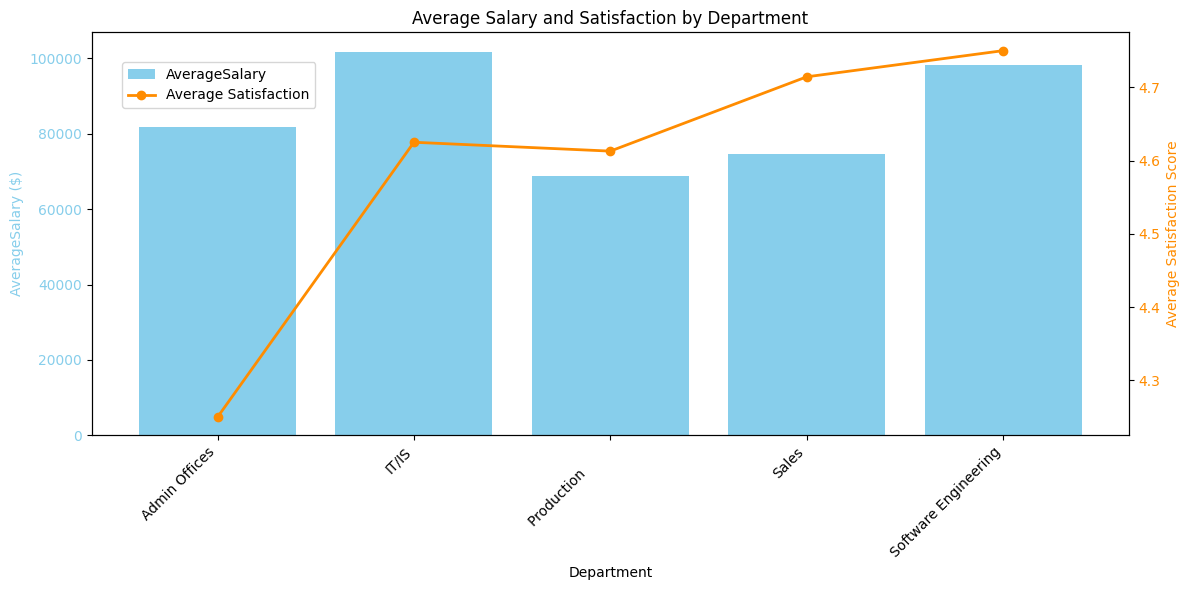

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for average salary
bar = ax1.bar(dept_stats['Department'], dept_stats['AverageSalary'], color='skyblue', label='AverageSalary')
ax1.set_xlabel('Department')
ax1.set_ylabel('AverageSalary ($)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(dept_stats['Department'], rotation=45, ha='right')

# Second Y-axis for satisfaction
ax2 = ax1.twinx()
line = ax2.plot(dept_stats['Department'], dept_stats['AverageSatisfaction'], color='darkorange', marker='o', linewidth=2, label='Average Satisfaction')
ax2.set_ylabel('Average Satisfaction Score', color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')

# Add title and legends
plt.title('Average Salary and Satisfaction by Department')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.tight_layout()
plt.show()


In [ ]:
# Load filtered data from Task 1
df = pd.read_csv('filtered_employees.csv')


In [ ]:
# Group by performance score and calculate average absences
performance_absences = df.groupby('PerformanceScore')['Absences'].mean().reset_index()
performance_absences.columns = ['PerformanceScore', 'AverageAbsences']


<ipython-input-17-de70fdaac638>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


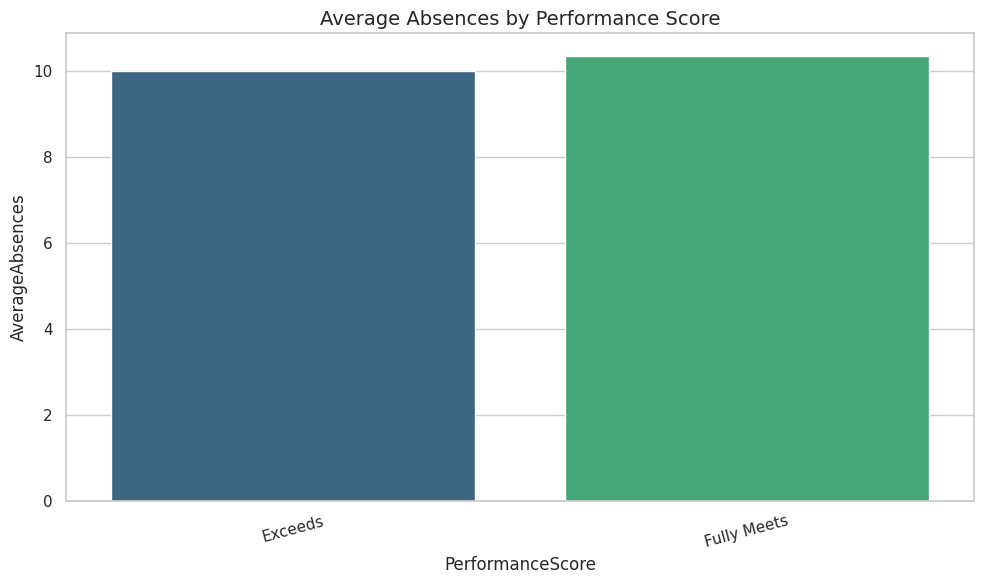

In [ ]:
import seaborn as sns

# Set the theme
sns.set(style="whitegrid")

# Plot with seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=performance_absences,
    x='PerformanceScore',
    y='AverageAbsences',
    palette='viridis'
)

# Customize chart
plt.title('Average Absences by Performance Score', fontsize=14)
plt.xlabel('PerformanceScore', fontsize=12)
plt.ylabel('AverageAbsences', fontsize=12)
plt.xticks(rotation=15)
ax.legend_.remove() if ax.legend_ else None  # Remove legend if it appears

plt.tight_layout()
plt.show()


In [ ]:
# Load filtered dataset
df = pd.read_csv('filtered_employees.csv')


In [ ]:
# Count the number of employees in each department
department_counts = df['Department'].value_counts()


In [ ]:
# Group by department and describe salary statistics
salary_stats = df.groupby('Department')['Salary'].describe()

# Display salary stats
print("📈 Salary Statistics by Department:")
print(salary_stats)


📈 Salary Statistics by Department:
                      count           mean           std      min       25%  \
Department                                                                    
Admin Offices           4.0   81734.000000  21462.511425  63003.0  64140.75   
IT/IS                  24.0  101772.166667  36030.660232  61242.0  84073.25   
Production             31.0   68654.806452  19357.988612  60436.0  62334.00   
Sales                  14.0   74654.714286  30624.551022  60120.0  63392.00   
Software Engineering    4.0   98318.000000   6197.886360  92989.0  93294.25   

                          50%        75%       max  
Department                                          
Admin Offices         78783.0   96376.25  106367.0  
IT/IS                 93380.0  101829.75  220450.0  
Production            63763.0   66639.50  170500.0  
Sales                 66268.5   71140.50  180000.0  
Software Engineering  97297.5  102321.25  105688.0  


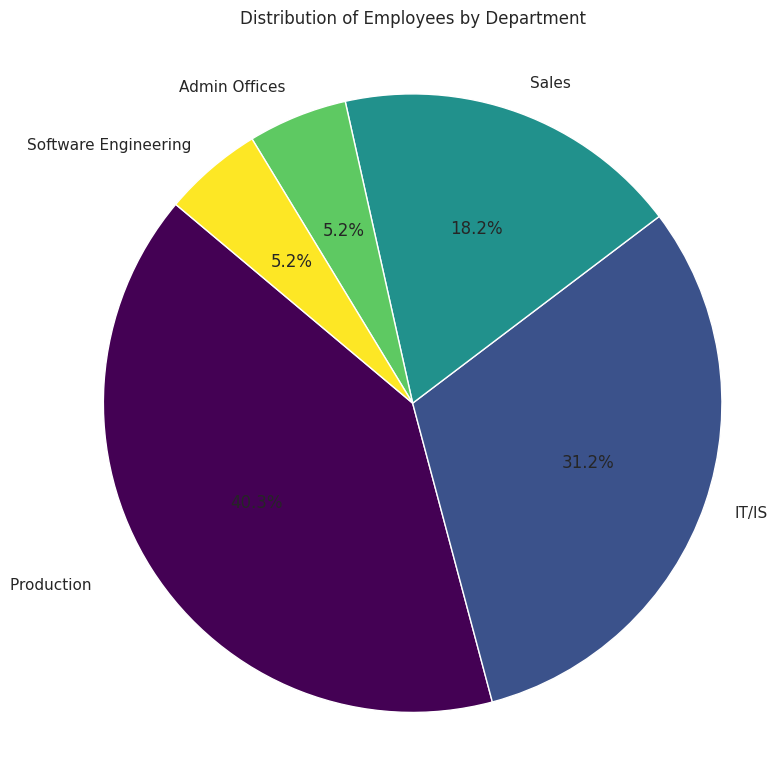

In [ ]:
import matplotlib.cm as cm
import numpy as np

# Use Viridis colormap
colors = cm.viridis(np.linspace(0, 1, len(department_counts)))

# Plot
plt.figure(figsize=(8, 8))
plt.pie(
    department_counts,
    labels=department_counts.index,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140
)

plt.title('Distribution of Employees by Department')
plt.axis('equal')  # Equal aspect ratio for a perfect circle
plt.tight_layout()
plt.show()


# SOLUTIONS

SELECT Employee_Name, EmpID, GenderID, Department, Position, Salary, PerformanceScore, EmpSatisfaction, EmploymentStatus, Absences
FROM employees
WHERE PerformanceScore IN ('Exceeds', 'Fully Meets')
    AND Termd = 0
    AND Salary > 60000
    AND EmpSatisfaction >= 4;

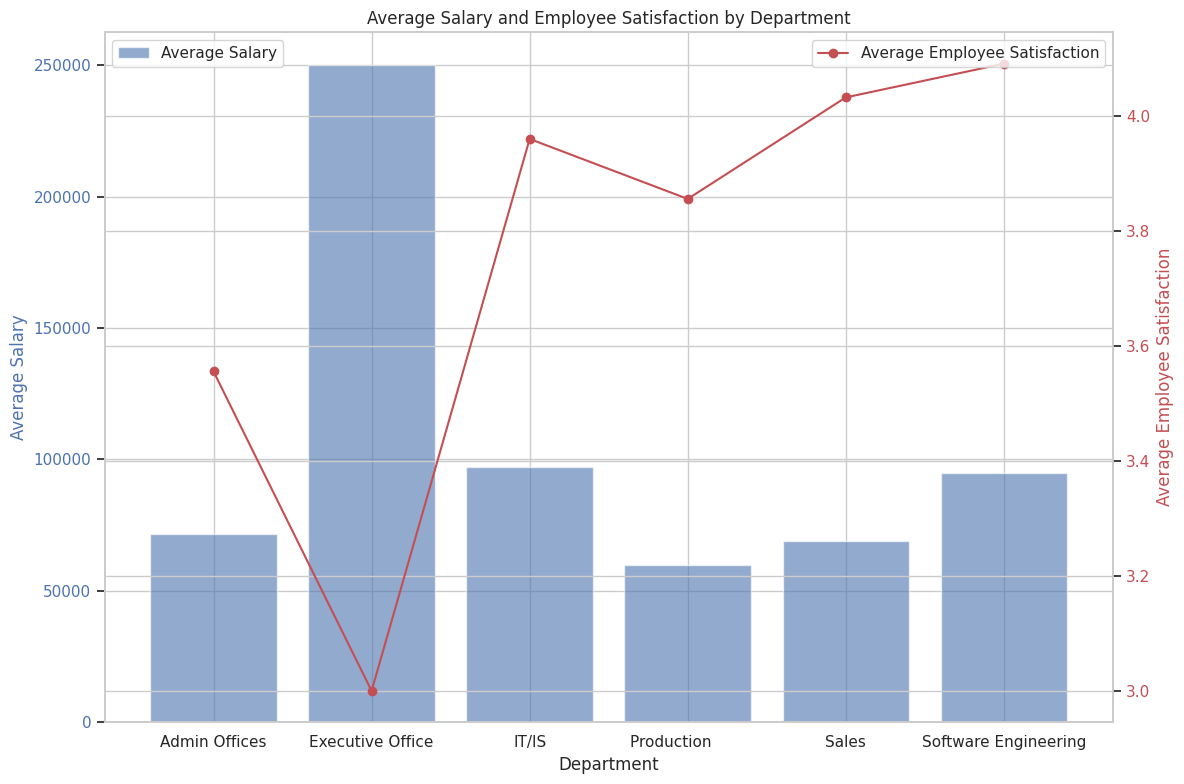

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the sample dataset
sample_file_path = '19-employees.csv'
sample_df = pd.read_csv(sample_file_path)

# Group by department and calculate the average salary and employee satisfaction
dept_analysis = sample_df.groupby('Department').agg({
    'Salary': 'mean',
    'EmpSatisfaction': 'mean'
}).reset_index()

# Plotting the results
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar chart for average salary
ax1.bar(dept_analysis['Department'], dept_analysis['Salary'], color='b', alpha=0.6, label='Average Salary')
ax1.set_xlabel('Department')
ax1.set_ylabel('Average Salary', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Creating a second y-axis for average employee satisfaction
ax2 = ax1.twinx()
ax2.plot(dept_analysis['Department'], dept_analysis['EmpSatisfaction'], color='r', marker='o', label='Average Employee Satisfaction')
ax2.set_ylabel('Average Employee Satisfaction', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Adding titles and legends
plt.title('Average Salary and Employee Satisfaction by Department')
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.show()

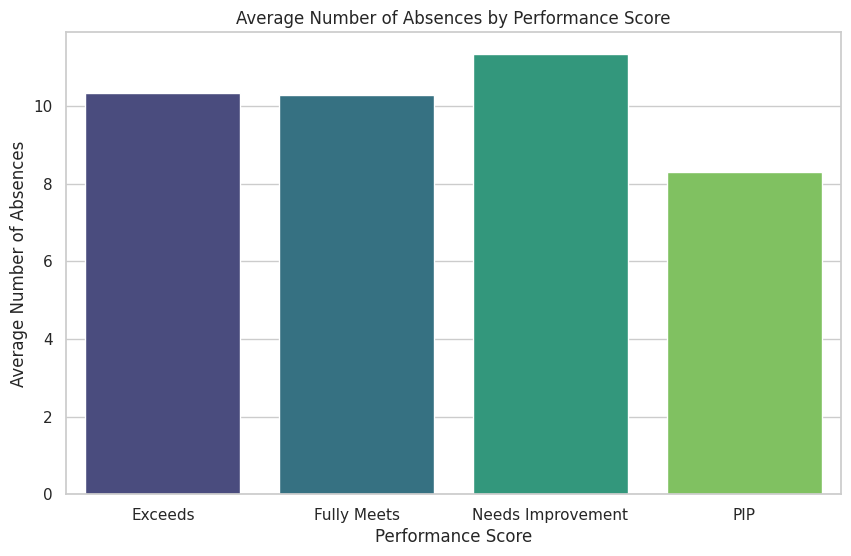

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the sample dataset
sample_file_path = '19-employees.csv'
sample_df = pd.read_csv(sample_file_path)

# Group by performance score and calculate the average number of absences
perf_analysis = sample_df.groupby('PerformanceScore').agg({
    'Absences': 'mean'
}).reset_index()

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x='PerformanceScore', y='Absences', data=perf_analysis, hue='PerformanceScore', dodge=False, palette='viridis')
plt.legend([],[], frameon=False)

# Adding titles and labels
plt.title('Average Number of Absences by Performance Score')
plt.xlabel('Performance Score')
plt.ylabel('Average Number of Absences')

# Show plot
plt.show()

                      count           mean           std       min        25%  \
Department                                                                      
Admin Offices           9.0   71791.888889  21706.397164   49920.0   55000.00   
Executive Office        1.0  250000.000000           NaN  250000.0  250000.00   
IT/IS                  50.0   97064.640000  33209.612190   50178.0   77417.75   
Production            201.0   60002.139303  11563.362470   45046.0   53018.00   
Sales                  31.0   69061.258065  21271.393236   55875.0   61561.50   
Software Engineering   11.0   94989.454545   9566.505698   77692.0   89601.50   

                           50%       75%       max  
Department                                          
Admin Offices          63003.0   93046.0  106367.0  
Executive Office      250000.0  250000.0  250000.0  
IT/IS                  92328.5  106844.5  220450.0  
Production             59369.0   64057.0  170500.0  
Sales                  65310.0   

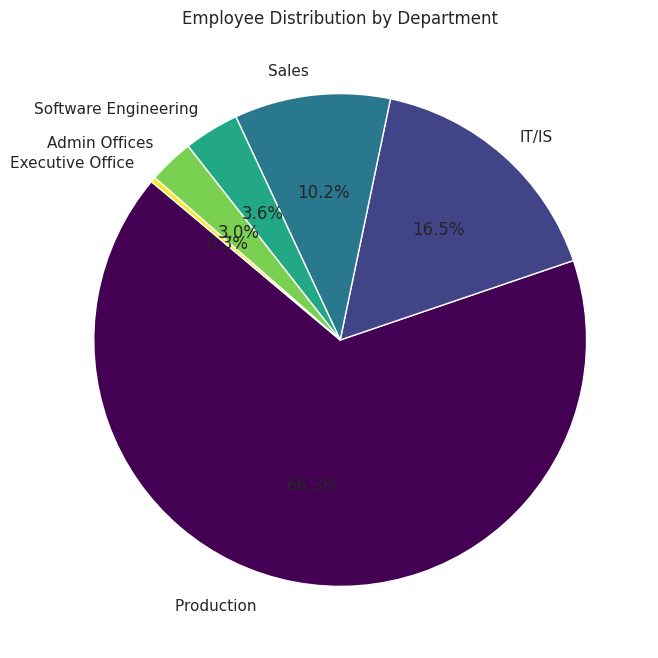

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the sample dataset
sample_file_path = '19-employees.csv'
sample_df = pd.read_csv(sample_file_path)

# Analyzing the distribution of employees across different departments
dept_distribution = sample_df['Department'].value_counts()

# Salary statistics within each department
salary_stats = sample_df.groupby('Department')['Salary'].describe()

# Display the salary statistics
print(salary_stats)

# Plotting the pie chart for department distribution
plt.figure(figsize=(10, 8))
plt.pie(dept_distribution, labels=dept_distribution.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis(np.linspace(0, 1, len(dept_distribution))))

# Adding titles
plt.title('Employee Distribution by Department')

# Show plot
plt.show()